In [21]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

### Relevant Variables

Link to Study: <a href='https://www.icpsr.umich.edu/web/ICPSR/series/253/studies'>https://www.icpsr.umich.edu/web/ICPSR/series/253/studies</a>
<table>
    <thead>
        <tr>
            <th scope='col'>Original Variable</th>
            <th scope='col'>Renamed Variable</th>
            <th scope='col'>Description</th>
    </thead>
    <tbody>
        <tr>
            <td>SWANID</td>
            <td>SWANID</td>
            <td>Respondent ID for the study</td>
        <tr>
            <td>AGE[n]</td>
            <td>age_[n]</td>
            <td>
                Age at current visit (Integer)<br><br>
                <i>
                    n denotes which dataset the variable belongs to,<br>
                    with 0 being the baseline and 1-10 being each visit
                </i>
            </td>
        <tr>
            <td>RACE</td>
            <td>race</td>
            <td>Race/ethnicity</td>
        <tr>
            <td>STATUS[n]</td>
            <td>meno_status_[n]</td>
            <td>
                Menopausal Status<br><br>
                <i>
                    n denotes which dataset the variable belongs to,<br>
                    with 0 being the baseline and 1-10 being each visit
                </i>
            </td>
    </tobdy>
</table>

In [22]:
#Dictionaries for translating variables
race_dict = {'1':'Black/African American', 
             '2':'Chinese/Chinese American', 
             '3':'Japanese/Japnese American', 
             '4':'Caucasian/White Non-Hispanic', 
             '5':'Hispanic'
             }

meno_status_dict = {'1':'Post by Bilateral Salpingo Oophorectomy', 
                    '2':'Natural post',
                    '3':'Late perimenopause',
                    '4':'Early perimenopause',
                    '5':'Pre-menopausal',
                    '6':'Pregnant/breastfeeding',
                    '7':'Unknown due to hormone therapy use',
                    '8':'Unknown due to hysterectomy',
                    ' ':np.nan
                    }

In [23]:

def basic_cleanup (df):

    '''Translate common data points present in all the studies, namely age, ethnicity, and menopausal status
    
    Parameters:
        df (pandas.DataFrame): Dataframe to be cleaned up, Before running this function, filter the dataframe to only 
        include your relevant columns, and rename the appropriate cloumns to 'age', 'race', and 'meno_status' respectively
    '''

    #Ensure data is correct type for translation
    df['age'] = df['age'].astype('str')
    df['race'] = df['race'].astype('str')
    df['meno_status'] = df['meno_status'].astype('str')
    
    #Fills empty cells in age with NaN
    df['age'] = df['age'].replace({' ':np.nan})

    #Translate race values
    df['race'] = df['race'].replace(race_dict)

    #Translate menopause status values
    df['meno_status'] = df['meno_status'].replace(meno_status_dict)

    return df

In [24]:
visit_00 = pd.read_csv(r'..\ICPSR\ICPSR_28762 (Baseline Visit 00)\DS0001\Visit_00.tsv', sep='\t')

#Reduce dataframe to only the relevant columns
visit_00 = visit_00.filter(['SWANID', 'AGE0', 'RACE', 'STATUS0'], axis=1)

visit_00 = visit_00.rename(columns={'AGE0':'age', 'RACE':'race', 'STATUS0':'meno_status'})

basic_cleanup(visit_00)

visit_00

C:\Users\ivanl\AppData\Local\Temp\ipykernel_23736\3648113512.py:1: DtypeWarning: Columns (3,44,62,68,86,137,140,144,148,157,158,165,169,171,175,177,181,183,260,261,262,264,266,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,342,343,344,345,347,348,349,350,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,400,402,404,406,407,408,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,

,SWANID,age,race,meno_status
0,10005,48,Hispanic,NaN
1,10046,52,Chinese/Chinese American,Early perimenopause
2,10056,51,Caucasian/White Non-Hispanic,Pre-menopausal
3,10092,45,Caucasian/White Non-Hispanic,Early perimenopause
4,10126,48,Black/African American,Early perimenopause
...,...,...,...,...
3297,99879,44,Black/African American,Early perimenopause
3298,99888,48,Japanese/Japnese American,Pre-menopausal
3299,99898,45,Caucasian/White Non-Hispanic,Early perimenopause
3300,99962,47,Chinese/Chinese American,Early perimenopause


In [25]:
visit_01 = pd.read_csv(r'..\ICPSR\ICPSR_29221 (Visit 01)\DS0001\Visit_01.tsv', sep='\t')

#Reduce dataframe to only the relevant columns
visit_01 = visit_01.filter(['SWANID', 'AGE1', 'RACE', 'STATUS1'], axis=1)

visit_01 = visit_01.rename(columns={'AGE1':'age', 'RACE':'race', 'STATUS1':'meno_status'})

#Rename columns
basic_cleanup (visit_01)

#Drops every row where respondent doesn't list age or menopause status
visit_01 = visit_01.dropna(how='all', subset=['age', 'meno_status'])

visit_01

,SWANID,age,race,meno_status
0,10046,53,Chinese/Chinese American,Unknown due to hormone therapy use
1,10056,52,Caucasian/White Non-Hispanic,Early perimenopause
2,10092,46,Caucasian/White Non-Hispanic,Early perimenopause
3,10126,50,Black/African American,Early perimenopause
4,10153,52,Japanese/Japnese American,Early perimenopause
...,...,...,...,...
2876,99879,45,Black/African American,Early perimenopause
2877,99888,49,Japanese/Japnese American,Unknown due to hormone therapy use
2878,99898,46,Caucasian/White Non-Hispanic,Early perimenopause
2879,99962,48,Chinese/Chinese American,Early perimenopause


In [26]:
visit_02 = pd.read_csv(r'..\ICPSR\ICPSR_29401 (Visit 02)\DS0001\Visit_02.tsv', sep='\t')

#Reduce dataframe to only the relevant columns
visit_02 = visit_02.filter(['SWANID', 'AGE2', 'RACE', 'STATUS2'], axis=1)

#Rename columns
visit_02 = visit_02.rename(columns={'AGE2':'age', 'RACE':'race', 'STATUS2':'meno_status'})

basic_cleanup(visit_02)

#Drops every row where respondent doesn't list age or menopause status
visit_02 = visit_02.dropna(how='all', subset=['age', 'meno_status'])

visit_02

,SWANID,age,race,meno_status
0,10046,54,Chinese/Chinese American,Unknown due to hormone therapy use
1,10056,53,Caucasian/White Non-Hispanic,Early perimenopause
2,10126,50,Black/African American,Early perimenopause
3,10153,53,Japanese/Japnese American,Late perimenopause
4,10196,48,Chinese/Chinese American,Early perimenopause
...,...,...,...,...
2743,99809,45,Caucasian/White Non-Hispanic,Unknown due to hormone therapy use
2744,99888,50,Japanese/Japnese American,Early perimenopause
2745,99898,47,Caucasian/White Non-Hispanic,Early perimenopause
2746,99962,49,Chinese/Chinese American,Early perimenopause


In [27]:
visit_03 = pd.read_csv(r'..\ICPSR\ICPSR_29701 (Visit 03)\DS0001\Visit_03.tsv', sep='\t')

#Reduce dataframe to only the relevant columns
visit_03 = visit_03.filter(['SWANID', 'AGE3', 'RACE', 'STATUS3'], axis=1)

#Rename columns
visit_03 = visit_03.rename(columns={'AGE3':'age', 'RACE':'race', 'STATUS3':'meno_status'})

basic_cleanup(visit_03)

#Drops every row where respondent doesn't list age or menopause status
visit_03 = visit_03.dropna(how='all', subset=['age', 'meno_status'])

visit_03

,SWANID,age,race,meno_status
0,10046,55,Chinese/Chinese American,Unknown due to hormone therapy use
1,10056,54,Caucasian/White Non-Hispanic,Natural post
2,10126,51,Black/African American,Early perimenopause
3,10153,54,Japanese/Japnese American,Natural post
4,10196,49,Chinese/Chinese American,Early perimenopause
...,...,...,...,...
2704,99809,46,Caucasian/White Non-Hispanic,Unknown due to hormone therapy use
2705,99888,52,Japanese/Japnese American,Early perimenopause
2706,99898,48,Caucasian/White Non-Hispanic,Early perimenopause
2707,99962,50,Chinese/Chinese American,Early perimenopause


In [28]:
visit_04 = pd.read_csv(r'..\ICPSR\ICPSR_30142 (Visit 04)\DS0001\Visit_04.tsv', sep='\t')

#Reduce dataframe to only the relevant columns
visit_04 = visit_04.filter(['SWANID', 'AGE4', 'RACE', 'STATUS4'], axis=1)

#Rename columns
visit_04 = visit_04.rename(columns={'AGE4':'age', 'RACE':'race', 'STATUS4':'meno_status'})

basic_cleanup(visit_04)

#Drops every row where respondent doesn't list age or menopause status
visit_04 = visit_04.dropna(how='all', subset=['age', 'meno_status'])

visit_04

,SWANID,age,race,meno_status
0,10046,56,Chinese/Chinese American,Unknown due to hormone therapy use
1,10056,55,Caucasian/White Non-Hispanic,Natural post
2,10126,52,Black/African American,Natural post
3,10153,55,Japanese/Japnese American,Natural post
4,10196,50,Chinese/Chinese American,Natural post
...,...,...,...,...
2674,99809,47,Caucasian/White Non-Hispanic,Unknown due to hormone therapy use
2675,99888,52,Japanese/Japnese American,Late perimenopause
2676,99898,49,Caucasian/White Non-Hispanic,Early perimenopause
2677,99962,51,Chinese/Chinese American,Early perimenopause


In [29]:
visit_05 = pd.read_csv(r'..\ICPSR\ICPSR_30501 (Visit 05)\DS0001\Visit_05.tsv', sep='\t')

#Reduce dataframe to only the relevant columns
visit_05 = visit_05.filter(['SWANID', 'AGE5', 'RACE', 'STATUS5'], axis=1)

#Rename columns
visit_05 = visit_05.rename(columns={'AGE5':'age', 'RACE':'race', 'STATUS5':'meno_status'})

basic_cleanup(visit_05)

#Drops every row where respondent doesn't list age or menopause status
visit_05 = visit_05.dropna(how='all', subset=['age', 'meno_status'])

visit_05

,SWANID,age,race,meno_status
0,10046,57,Chinese/Chinese American,Unknown due to hormone therapy use
1,10056,56,Caucasian/White Non-Hispanic,Natural post
2,10126,53,Black/African American,Natural post
3,10153,56,Japanese/Japnese American,Natural post
4,10196,51,Chinese/Chinese American,Natural post
...,...,...,...,...
2612,99809,48,Caucasian/White Non-Hispanic,Unknown due to hormone therapy use
2613,99888,54,Japanese/Japnese American,Natural post
2614,99898,50,Caucasian/White Non-Hispanic,Early perimenopause
2615,99962,52,Chinese/Chinese American,Late perimenopause


In [30]:
visit_06 = pd.read_csv(r'..\ICPSR\ICPSR_31181 (Visit 06)\DS0001\Visit_06.tsv', sep='\t')

#Reduce dataframe to only the relevant columns
visit_06 = visit_06.filter(['SWANID', 'AGE6', 'RACE', 'STATUS6'], axis=1)

#Rename columns
visit_06 = visit_06.rename(columns={'AGE6':'age', 'RACE':'race', 'STATUS6':'meno_status'})

basic_cleanup(visit_06)

#Drops every row where respondent doesn't list age or menopause status
visit_06 = visit_06.dropna(how='all', subset=['age', 'meno_status'])

visit_06

C:\Users\ivanl\AppData\Local\Temp\ipykernel_23736\3601790768.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  visit_06 = pd.read_csv(r'..\ICPSR\ICPSR_31181 (Visit 06)\DS0001\Visit_06.tsv', sep='\t')


,SWANID,age,race,meno_status
0,10046,58,Chinese/Chinese American,Unknown due to hormone therapy use
1,10056,57,Caucasian/White Non-Hispanic,Natural post
2,10126,54,Black/African American,Natural post
3,10153,57,Japanese/Japnese American,Natural post
4,10196,52,Chinese/Chinese American,Natural post
...,...,...,...,...
2443,99805,48,Black/African American,Post by Bilateral Salpingo Oophorectomy
2444,99809,49,Caucasian/White Non-Hispanic,Unknown due to hormone therapy use
2445,99888,54,Japanese/Japnese American,Natural post
2446,99898,51,Caucasian/White Non-Hispanic,Early perimenopause


In [31]:
visit_07 = pd.read_csv(r'..\ICPSR\ICPSR_31901 (Visit 07)\DS0001\Visit_07.tsv', sep='\t')

#Reduce dataframe to only the relevant columns
visit_07 = visit_07.filter(['SWANID', 'AGE7', 'RACE', 'STATUS7'], axis=1)

#Rename columns
visit_07 = visit_07.rename(columns={'AGE7':'age', 'RACE':'race', 'STATUS7':'meno_status'})

basic_cleanup(visit_07)

#Drops every row where respondent doesn't list age or menopause status
visit_07 = visit_07.dropna(how='all', subset=['age', 'meno_status'])

visit_07

C:\Users\ivanl\AppData\Local\Temp\ipykernel_23736\913744777.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  visit_07 = pd.read_csv(r'..\ICPSR\ICPSR_31901 (Visit 07)\DS0001\Visit_07.tsv', sep='\t')


,SWANID,age,race,meno_status
0,10046,59,Chinese/Chinese American,Unknown due to hormone therapy use
1,10056,58,Caucasian/White Non-Hispanic,Natural post
2,10153,58,Japanese/Japnese American,Natural post
3,10196,53,Chinese/Chinese American,Natural post
4,10245,54,Caucasian/White Non-Hispanic,Natural post
...,...,...,...,...
2408,99805,49,Black/African American,Post by Bilateral Salpingo Oophorectomy
2409,99809,50,Caucasian/White Non-Hispanic,Unknown due to hormone therapy use
2410,99888,56,Japanese/Japnese American,Natural post
2411,99898,52,Caucasian/White Non-Hispanic,Early perimenopause


In [32]:
visit_08 = pd.read_csv(r'..\ICPSR\ICPSR_32122 (Visit 08)\DS0001\Visit_08.tsv', sep='\t')

#Reduce dataframe to only the relevant columns
visit_08 = visit_08.filter(['SWANID', 'AGE8', 'RACE', 'STATUS8'], axis=1)

#Rename columns
visit_08 = visit_08.rename(columns={'AGE8':'age', 'RACE':'race', 'STATUS8':'meno_status'})

basic_cleanup(visit_08)

#Drops every row where respondent doesn't list age or menopause status
visit_08 = visit_08.dropna(how='all', subset=['age', 'meno_status'])

visit_08

C:\Users\ivanl\AppData\Local\Temp\ipykernel_23736\1601971050.py:1: DtypeWarning: Columns (3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,51,52,53,54,57,58,59,60,61,63,64,65,66,67,68,69,70,71,72,73,74,75,85,87,88,90,91,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,477,478,482,483,484,485,486,490,491,495,504,506,507,515,522,530,536,537,538,539,577) have mixed types. Specify dtype option on import or set low_memory=False.
  visit_08 = pd.read_csv(r'..\ICPSR\ICPSR_32122 (Visit 08)\DS0001\Visit_08.tsv', sep='\t')


,SWANID,age,race,meno_status
0,10046,60,Chinese/Chinese American,Unknown due to hormone therapy use
1,10056,59,Caucasian/White Non-Hispanic,Natural post
2,10126,57,Black/African American,Natural post
3,10153,59,Japanese/Japnese American,Natural post
4,10196,54,Chinese/Chinese American,Natural post
...,...,...,...,...
2273,99805,50,Black/African American,Post by Bilateral Salpingo Oophorectomy
2274,99809,51,Caucasian/White Non-Hispanic,Unknown due to hormone therapy use
2275,99888,57,Japanese/Japnese American,Natural post
2276,99898,53,Caucasian/White Non-Hispanic,Post by Bilateral Salpingo Oophorectomy


In [33]:
visit_09 = pd.read_csv(r'..\ICPSR\ICPSR_32721 (Visit 09)\DS0001\Visit_09.tsv', sep='\t')

#Reduce dataframe to only the relevant columns
visit_09 = visit_09.filter(['SWANID', 'AGE9', 'RACE', 'STATUS9'], axis=1)

#Rename columns
visit_09 = visit_09.rename(columns={'AGE9':'age', 'RACE':'race', 'STATUS9':'meno_status'})

basic_cleanup(visit_09)

#Drops every row where respondent doesn't list age or menopause status
visit_09 = visit_09.dropna(how='all', subset=['age', 'meno_status'])

visit_09

C:\Users\ivanl\AppData\Local\Temp\ipykernel_23736\2421902620.py:1: DtypeWarning: Columns (3,4,5,51,57,63,67,71,504,522,1277) have mixed types. Specify dtype option on import or set low_memory=False.
  visit_09 = pd.read_csv(r'..\ICPSR\ICPSR_32721 (Visit 09)\DS0001\Visit_09.tsv', sep='\t')


,SWANID,age,race,meno_status
0,10046,61,Chinese/Chinese American,Unknown due to hormone therapy use
1,10056,60,Caucasian/White Non-Hispanic,Natural post
2,10126,58,Black/African American,Natural post
3,10153,60,Japanese/Japnese American,Natural post
4,10196,55,Chinese/Chinese American,Natural post
...,...,...,...,...
2464,99805,51,Black/African American,Post by Bilateral Salpingo Oophorectomy
2465,99809,52,Caucasian/White Non-Hispanic,Early perimenopause
2466,99888,58,Japanese/Japnese American,Natural post
2467,99898,54,Caucasian/White Non-Hispanic,Post by Bilateral Salpingo Oophorectomy


In [34]:
visit_10 = pd.read_csv(r'..\ICPSR\ICPSR_32961 (Visit 10)\DS0001\Visit_10.tsv', sep='\t')

#Reduce dataframe to only the relevant columns
visit_10 = visit_10.filter(['SWANID', 'AGE10', 'RACE', 'STATUS10'], axis=1)

#Rename columns
visit_10 = visit_10.rename(columns={'AGE10':'age', 'RACE':'race', 'STATUS10':'meno_status'})

basic_cleanup(visit_10)

#Drops every row where respondent doesn't list age or menopause status
visit_10 = visit_10.dropna(how='all', subset=['age', 'meno_status'])

visit_10

C:\Users\ivanl\AppData\Local\Temp\ipykernel_23736\3172697788.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,46,47,48,49,50,51,52,53,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,84,86,87,90,91,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,477,478,482,483,484,485,486,490,491,492,495,504,506,507,515,522,523,525,530,535,536,537,538,563,567) have mixed types. Specify dtype option on import or set low_memory=False.
  visit_10 = pd.read_csv(r'..\ICPSR\ICPSR_32961 (Visit 10)\DS0001\Visit_10.tsv', sep='\t')


,SWANID,age,race,meno_status
0,10046,62,Chinese/Chinese American,Unknown due to hormone therapy use
1,10056,61,Caucasian/White Non-Hispanic,Natural post
2,10153,61,Japanese/Japnese American,Natural post
3,10196,56,Chinese/Chinese American,Natural post
4,10245,57,Caucasian/White Non-Hispanic,Natural post
...,...,...,...,...
2240,99805,52,Black/African American,Post by Bilateral Salpingo Oophorectomy
2241,99809,53,Caucasian/White Non-Hispanic,Early perimenopause
2242,99888,58,Japanese/Japnese American,Natural post
2243,99898,55,Caucasian/White Non-Hispanic,Post by Bilateral Salpingo Oophorectomy


In [35]:
df_list = [visit_01, visit_02, visit_03, visit_04, visit_05, visit_06, visit_07, visit_08, visit_09, visit_10]

counter = 0

#setup base dataframe and reorders columns for later
merged = visit_00[['SWANID', 'race', 'age', 'meno_status']]

for df in df_list:

    #iterates through every df, matching and merging rows based on SWAN ID and race
    #how='outer' parameter makes it so that every participant is preserved, even if they didn't participate for all 11 studies
    
    merged = merged.join(df.set_index(['SWANID', 'race']), on=['SWANID', 'race'], how='outer', lsuffix=f'_{counter}', rsuffix=f'_{counter + 1}', validate='1:1')

    #suffixes update by +1  with each iteration and help match menopause status and age to the dataset they originated from
    counter = counter + 1

#doesn't properly apply suffixes on the last two for some reason, fixing them manually
merged = merged.rename(columns={'age':'age_10', 'meno_status':'meno_status_10'})

merged

,SWANID,race,age_0,meno_status_0,age_1,meno_status_1,age_2,meno_status_2,age_3,meno_status_3,...,age_6,meno_status_6,age_7,meno_status_7,age_8,meno_status_8,age_9,meno_status_9,age_10,meno_status_10
0,10005,Hispanic,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10046,Chinese/Chinese American,52,Early perimenopause,53,Unknown due to hormone therapy use,54,Unknown due to hormone therapy use,55,Unknown due to hormone therapy use,...,58,Unknown due to hormone therapy use,59,Unknown due to hormone therapy use,60,Unknown due to hormone therapy use,61,Unknown due to hormone therapy use,62,Unknown due to hormone therapy use
2,10056,Caucasian/White Non-Hispanic,51,Pre-menopausal,52,Early perimenopause,53,Early perimenopause,54,Natural post,...,57,Natural post,58,Natural post,59,Natural post,60,Natural post,61,Natural post
3,10092,Caucasian/White Non-Hispanic,45,Early perimenopause,46,Early perimenopause,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10126,Black/African American,48,Early perimenopause,50,Early perimenopause,50,Early perimenopause,51,Early perimenopause,...,54,Natural post,NaN,NaN,57,Natural post,58,Natural post,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297,99879,Black/African American,44,Early perimenopause,45,Early perimenopause,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3298,99888,Japanese/Japnese American,48,Pre-menopausal,49,Unknown due to hormone therapy use,50,Early perimenopause,52,Early perimenopause,...,54,Natural post,56,Natural post,57,Natural post,58,Natural post,58,Natural post
3299,99898,Caucasian/White Non-Hispanic,45,Early perimenopause,46,Early perimenopause,47,Early perimenopause,48,Early perimenopause,...,51,Early perimenopause,52,Early perimenopause,53,Post by Bilateral Salpingo Oophorectomy,54,Post by Bilateral Salpingo Oophorectomy,55,Post by Bilateral Salpingo Oophorectomy
3300,99962,Chinese/Chinese American,47,Early perimenopause,48,Early perimenopause,49,Early perimenopause,50,Early perimenopause,...,53,Natural post,54,Natural post,55,Natural post,56,Natural post,57,Natural post


In [36]:
'''
Code Testing:

change_1 = merged['meno_status_0'].compare(merged['meno_status_1']).dropna()

change_1 = change_1.assign(change = change_1['self'] + ' to ' + change_1['other'])

merged.insert(loc=5, column='change_1', value=change_1['change'])

merged

'''

#Note: only compares adjacent years, does not compare properly if the subject skips a few years of taking the survey

#counter to update iterations to compare succesive sets of two columns (0 and 1, 1 and 2, etc.)
counter = 0

#location number to merge the change column back into the original dataframe in the correct position
location = 5

while counter < 10:

    #creates new dataframe comparing one menopause status column (self) with the one immediately after it (other)
    comparison = merged[f'meno_status_{counter}'].compare(merged[f'meno_status_{counter+1}']).dropna()

    #creates a third column combining the before and after column to create a label column of changes that occured
    comparison = comparison.assign(new_col = comparison['self'] + ' to ' + comparison['other'])

    #inserts the third column back into the original dataframe with a name matching the age of the 'after' column
    merged.insert(loc=location, column=f'change_{counter+1}', value=comparison['new_col'])

    #update counter to compare the next set of columns in the next iteration
    counter = counter + 1

    #update location to place the change column after the corresponding age column
    location = location + 3

merged


,SWANID,race,age_0,meno_status_0,age_1,change_1,meno_status_1,age_2,change_2,meno_status_2,...,meno_status_7,age_8,change_8,meno_status_8,age_9,change_9,meno_status_9,age_10,change_10,meno_status_10
0,10005,Hispanic,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10046,Chinese/Chinese American,52,Early perimenopause,53,Early perimenopause to Unknown due to hormone ...,Unknown due to hormone therapy use,54,NaN,Unknown due to hormone therapy use,...,Unknown due to hormone therapy use,60,NaN,Unknown due to hormone therapy use,61,NaN,Unknown due to hormone therapy use,62,NaN,Unknown due to hormone therapy use
2,10056,Caucasian/White Non-Hispanic,51,Pre-menopausal,52,Pre-menopausal to Early perimenopause,Early perimenopause,53,NaN,Early perimenopause,...,Natural post,59,NaN,Natural post,60,NaN,Natural post,61,NaN,Natural post
3,10092,Caucasian/White Non-Hispanic,45,Early perimenopause,46,NaN,Early perimenopause,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10126,Black/African American,48,Early perimenopause,50,NaN,Early perimenopause,50,NaN,Early perimenopause,...,NaN,57,NaN,Natural post,58,NaN,Natural post,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297,99879,Black/African American,44,Early perimenopause,45,NaN,Early perimenopause,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3298,99888,Japanese/Japnese American,48,Pre-menopausal,49,Pre-menopausal to Unknown due to hormone thera...,Unknown due to hormone therapy use,50,Unknown due to hormone therapy use to Early pe...,Early perimenopause,...,Natural post,57,NaN,Natural post,58,NaN,Natural post,58,NaN,Natural post
3299,99898,Caucasian/White Non-Hispanic,45,Early perimenopause,46,NaN,Early perimenopause,47,NaN,Early perimenopause,...,Early perimenopause,53,Early perimenopause to Post by Bilateral Salpi...,Post by Bilateral Salpingo Oophorectomy,54,NaN,Post by Bilateral Salpingo Oophorectomy,55,NaN,Post by Bilateral Salpingo Oophorectomy
3300,99962,Chinese/Chinese American,47,Early perimenopause,48,NaN,Early perimenopause,49,NaN,Early perimenopause,...,Natural post,55,NaN,Natural post,56,NaN,Natural post,57,NaN,Natural post


In [37]:
meno_status_columns = ['meno_status_0', 'meno_status_1', 'meno_status_2', 'meno_status_3', 'meno_status_4', 'meno_status_5', 'meno_status_6', 'meno_status_7', 'meno_status_8', 'meno_status_9', 'meno_status_10']

#create new dataframe with dropped status columns as we are interested in when subjects transition between phases of menopause
changes = merged.drop(meno_status_columns, axis=1)

changes

,SWANID,race,age_0,age_1,change_1,age_2,change_2,age_3,change_3,age_4,...,age_6,change_6,age_7,change_7,age_8,change_8,age_9,change_9,age_10,change_10
0,10005,Hispanic,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10046,Chinese/Chinese American,52,53,Early perimenopause to Unknown due to hormone ...,54,NaN,55,NaN,56,...,58,NaN,59,NaN,60,NaN,61,NaN,62,NaN
2,10056,Caucasian/White Non-Hispanic,51,52,Pre-menopausal to Early perimenopause,53,NaN,54,Early perimenopause to Natural post,55,...,57,NaN,58,NaN,59,NaN,60,NaN,61,NaN
3,10092,Caucasian/White Non-Hispanic,45,46,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10126,Black/African American,48,50,NaN,50,NaN,51,NaN,52,...,54,NaN,NaN,NaN,57,NaN,58,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3297,99879,Black/African American,44,45,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3298,99888,Japanese/Japnese American,48,49,Pre-menopausal to Unknown due to hormone thera...,50,Unknown due to hormone therapy use to Early pe...,52,NaN,52,...,54,NaN,56,NaN,57,NaN,58,NaN,58,NaN
3299,99898,Caucasian/White Non-Hispanic,45,46,NaN,47,NaN,48,NaN,49,...,51,NaN,52,NaN,53,Early perimenopause to Post by Bilateral Salpi...,54,NaN,55,NaN
3300,99962,Chinese/Chinese American,47,48,NaN,49,NaN,50,NaN,51,...,53,Late perimenopause to Natural post,54,NaN,55,NaN,56,NaN,57,NaN


In [38]:
#list of changes to observe, can be changed to include other changes and create data for them
changes_of_interest = ['Pre-menopausal to Natural post', 'Early perimenopause to Natural post', 'Late perimenopause to Natural post']

#loops through each of the changes we specified in the list above
for item in changes_of_interest:

    #initializes an empty column with the change as the title
    changes[item] = np.nan

    #counter to update iterations 
    change_counter = 1

    #loops through each of the change columns and stops iteration for an item on the changes_of_interest list when all of them have been checked
    while change_counter <= 10:

        #initializes empty list to merge into 
        change_list = []

        #creates pairs of change and their corresponding age
        for change, age in zip(changes[f'change_{change_counter}'], changes[f'age_{change_counter}']):
            
            #if the change matches the change specified in the changes_of_interest list, note down the age that it happened in the empyty list, otherwise fill in a blank
            if change == item:

                change_list.append(age)

            else: 

                change_list.append(np.nan)

        #we end up with a list of numbers and blanks that we cast into a Pandas Series
        change_list = pd.Series(change_list, dtype=float)

        #appends the Series onto the empty column initialized at the beginning, any numbers present will replace the blank NaNs
        changes[item].update(change_list)

        #update ethe counter to check the next change column
        change_counter = change_counter + 1

C:\Users\ivanl\AppData\Local\Temp\ipykernel_23736\1363018261.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  changes[item].update(change_list)
C:\Users\ivanl\AppData\Local\Temp\ipykernel_23736\1363018261.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [44]:
#merged.to_csv(r'..\ICPSR\SWAN_DATA.csv', index=False)
#changes.to_csv(r'..\ICPSR\SWAN_CHANGES.csv', index=False)

C:\Users\ivanl\AppData\Local\Temp\ipykernel_23736\2990224698.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=changes, y='race', palette=sns.color_palette())
C:\Users\ivanl\AppData\Local\Temp\ipykernel_23736\2990224698.py:1: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.countplot(data=changes, y='race', palette=sns.color_palette())


Text(0, 0.5, 'Race')

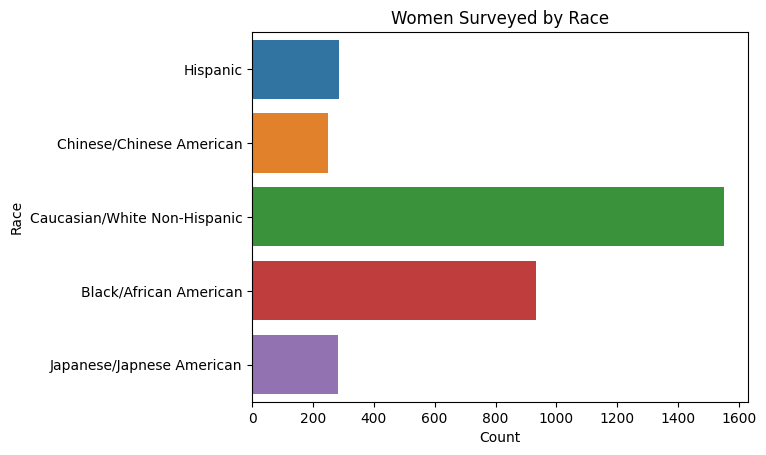

In [45]:
sns.countplot(data=changes, y='race', palette=sns.color_palette())

ax = plt.gca()

ax.set_title('Women Surveyed by Race')
ax.set_xlabel('Count')
ax.set_ylabel('Race')

C:\Users\ivanl\AppData\Local\Temp\ipykernel_23736\1475095499.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  changes['Entering Post'].update(changes[item])
C:\Users\ivanl\AppData\Local\Temp\ipykernel_23736\1475095499.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot (data=changes, x='Entering Post', y='race', palette=sns.color_palette())
C:\Users\ivanl\AppData\Local\Temp\i

Text(0, 0.5, 'Race')

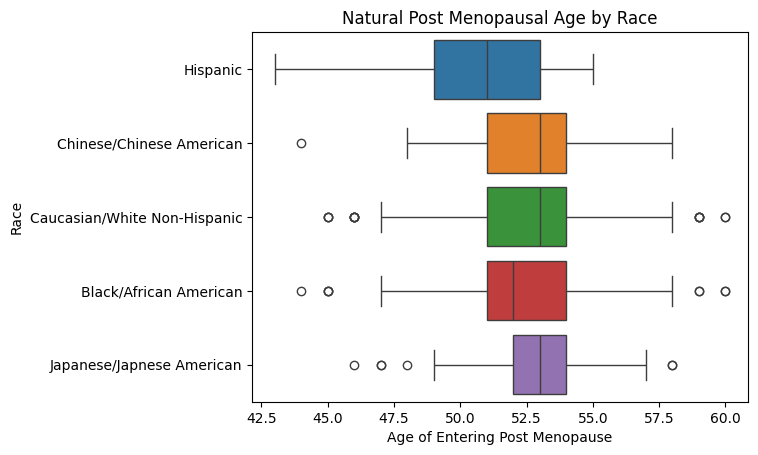

In [46]:
changes['Entering Post'] = np.nan

for item in changes_of_interest:
    changes['Entering Post'].update(changes[item])

sns.boxplot (data=changes, x='Entering Post', y='race', palette=sns.color_palette())

ax = plt.gca()

ax.set_title('Natural Post Menopausal Age by Race')
ax.set_xlabel('Age of Entering Post Menopause')
ax.set_ylabel('Race')
